<a href="https://colab.research.google.com/github/MaironTapia/ICD/blob/main/icd_taller2_variables_aleatorias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¡¡ ANTES DE EMPEZAR !!**

Deshabilita autocompletar con IA. Esta acción te ayudará a aprender de verdad. Si estás en Colab sigue estos pasos:



1.   Ir a Herramientas \ Configuración \ Asistencia de IA
2.   Desactivar la casilla **"Mostrar autocompletado impulsado por IA"**
3.   Activar la casilla **"Ocultar funciones de IA generativa"**


# **SIMULACIÓN DE VARIABLES ALEATORIAS DISCRETAS**

En este taller utilizaremos la librería `numpy` para la generación de números aleatorios y la simulación de experimentos con incertidumbre. Adicionalmente, emplearemos la librería `matplotlib.pyplot` para la visualización gráfica de las **distribuciones de probabilidad** mediante diagramas de barras e histogramas.

El objetivo de este taller es aplicar los conceptos teóricos de variables aleatorias discretas y sus funciones de masa, simulando experimentos repetidos para observar su comportamiento a largo plazo (técnica conocida como **simulación de Montecarlo**).

In [2]:
# Importamos las librerías necesarias para el desarrollo del taller.
# 'numpy' se utiliza para arreglos numéricos y generación de valores aleatorios.
# 'matplotlib.pyplot' para la creación de gráficos
import numpy as np
import matplotlib.pyplot as plt

## 1. Construcción a Partir de Datos de una Función de Masa: Suma de 2 Dados

A continuación, simularemos el lanzamiento de dos dados. Posteriormente, construiremos la función de masa de probabilidad para la variable aleatoria definida como el resultado de cada lanzamiento.

El dado cayó en 2


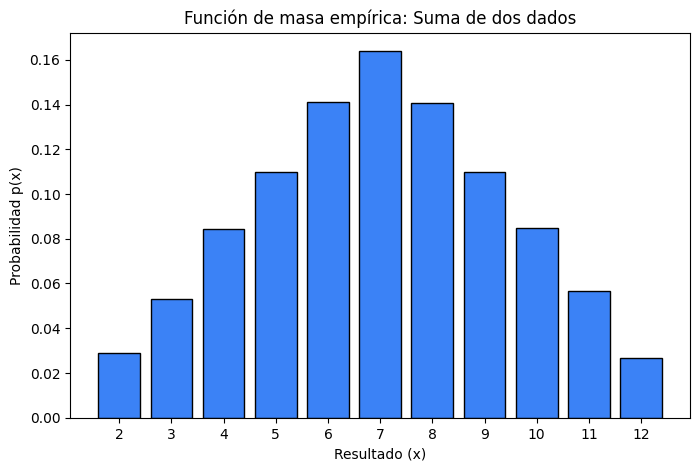

In [3]:
# -- Versión 1 --
# Definimos el número total de experimentos o simulaciones a realizar (tamaño de la muestra)
N = 10000

# La función np.random.randint(low, high) genera un números enteros aleatorio.
# El límite inferior ('low') es inclusivo, mientras que el límite superior ('high') es exclusivo.
# Todos los números tienen la misma probabilidad de ocurrir.
# Por lo tanto, para simular un dado de 6 caras, los límites son 1 y 7.

# Para ver 'randint' en funcionamiento, simulemos el lanzamiento de 1 dado:
# Nota: cada vez que se ejecute el código, el resultado de 'randint' cambiará
dado1 = np.random.randint(1,7)
print(f'El dado cayó en {dado1}')

# Simulamos el lanzamiento de los 2 dados N veces
resultados = []
for prueba in range(N):
  dado1 = np.random.randint(1,7)
  dado2 = np.random.randint(1,7)
  suma = dado1 + dado2
  resultados.append(suma)

# La función np.unique() identifica los valores únicos presentes en un arreglo.
# Al establecer 'return_counts=True', la función también devuelve la frecuencia absoluta de cada valor.
valores, conteos = np.unique(resultados, return_counts=True)

# Calculamos la frecuencia relativa (probabilidad empírica) dividiendo los conteos entre el total de experimentos.
probabilidades_empiricas = conteos / N

# Inicializamos la figura para el gráfico y definimos sus dimensiones (ancho, alto) en pulgadas.
plt.figure(figsize=(8, 5))

# plt.bar(x, height) genera un diagrama de barras.
# 'x' representa las categorías (valores posibles) y 'height' representa las alturas (probabilidades).
# El parámetro 'edgecolor' añade un contorno a las barras para mejorar la visualización.
plt.bar(valores, probabilidades_empiricas, color='#3b82f6', edgecolor='black')

# Asignamos el título principal y las etiquetas correspondientes a los ejes coordenados.
plt.title('Función de masa empírica: Suma de dos dados')
plt.xlabel('Resultado (x)')
plt.ylabel('Probabilidad p(x)')

# plt.xticks() fuerza explícitamente las marcas en el eje x para asegurar que se muestren todos los números del 2 al 12.
plt.xticks(range(2, 13))

# plt.show() muestra la figura
plt.show()

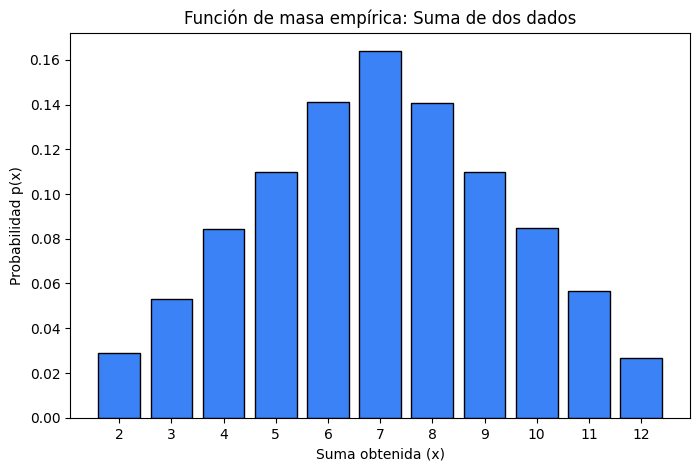

In [4]:
# -- Versión 2: Optimizada (cambiando el 'for' por operaciones vectoriales) --

N = 10000 # Número de experimentos

# Vamos a usar el parámetro 'size' en la función np.random.randint(low, high, size),
# Ahora, la función genera un arreglo de números enteros aleatorios de tamaño 'size'
dado1 = np.random.randint(1, 7, N)
dado2 = np.random.randint(1, 7, N)

# Realizamos la suma de los arreglos elemento a elemento para obtener la variable aleatoria de interés.
suma_dados = dado1 + dado2

# Realizamos el conteo:
valores, conteos = np.unique(suma_dados, return_counts=True)

# Calculamos la frecuencia relativa:
probabilidades_calculadas = conteos / N

# Graficamos:
plt.figure(figsize=(8, 5))

# plt.bar(x, height) genera un diagrama de barras.
# 'x' representa las categorías (valores posibles) y 'height' representa las alturas (probabilidades).
# El parámetro 'edgecolor' añade un contorno a las barras para mejorar la visualización.
plt.bar(valores, probabilidades_empiricas, color='#3b82f6', edgecolor='black')

# Asignamos el título principal y las etiquetas correspondientes a los ejes coordenados.
plt.title('Función de masa empírica: Suma de dos dados')
plt.xlabel('Suma obtenida (x)')
plt.ylabel('Probabilidad p(x)')

# plt.xticks() fuerza explícitamente las marcas en el eje x para asegurar que se muestren todos los números del 2 al 12.
plt.xticks(range(2, 13))

# plt.show() renderiza y despliega la figura generada en la salida de la celda.
plt.show()

**¿Qué sucede si el número de experimentos simulados se reduce mucho?**

## 2. Distribución Binomial: Simulación vs. Teoría

La distribución binomial modela la probabilidad de obtener exactamente $x$ "éxitos" en una secuencia de $n$ pruebas independientes, donde cada prueba tiene una probabilidad de éxito constante $a$.

En esta sección, no solo simularemos un proceso binomial, sino que superpondremos la **función de masa teórica** (calculada matemáticamente) sobre nuestra **función de masa empírica** (obtenida por simulación) para analizar qué tanto se aproximan.

**Contexto práctico:** Una campaña de marketing digital envía correos promocionales en lotes de 20 mensajes ($n = 20$). Históricamente, la probabilidad de que un usuario haga clic en el enlace es del 30%. Deseamos analizar la distribución del número de clics obtenidos por lote.

El resultado del experimento de Bernoulli es 1


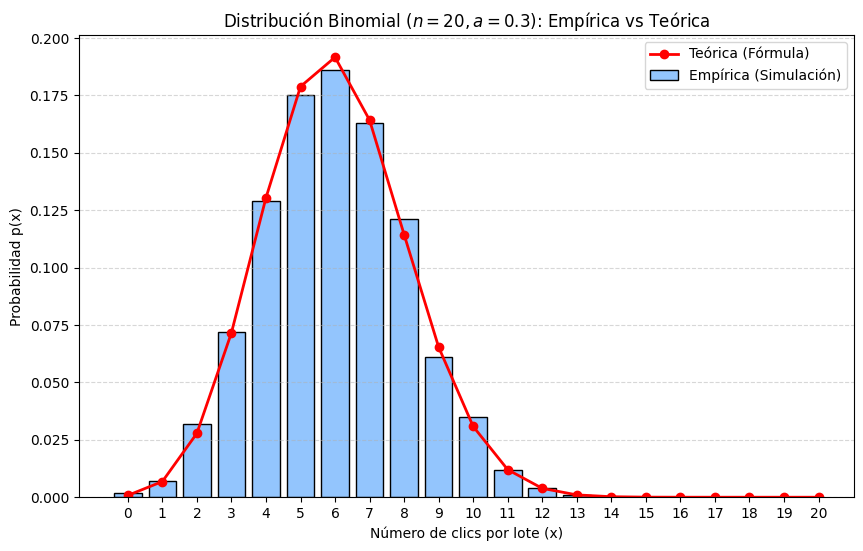

In [5]:
# Importamos math para calcular el 'número combinatorio', que usaremos para el cálculo teórico de la distribución binomial

# Importamos el módulo 'stats' de SciPy, para probabilidad y estadística en Python.
# Específicamente, importamos 'bernoulli'. Esta función retorna el resultado de un experimento de Bernoulli.
# Un experimento de Bernoulli es una prueba aleatoria con dos resultados posibles:
#"1" ("éxito") con probabilidad a y "0" ("fracaso") con probabilidad (1-a).
# Esto es justo lo que necesitamos para simular una variable aleatoria binomial

import math
from scipy.stats import bernoulli

# Para ver 'bernoulli' en funcionamiento, simulemos el resultado de 1 experimento de Bernoulli.
# Nota: cada vez que se ejecute el código, el resultado de 'randint' cambiará

# bernoulli.rvs(a) ejecuta la prueba de Bernoulli con probabilidad de éxito a
resultado_experimento = bernoulli.rvs(0.5)
print(f'El resultado del experimento de Bernoulli es {resultado_experimento}')

# ==========================================
# 0. EXPERIMENTO BINOMIAL
# ==========================================

# Definimos los parámetros del experimento binomial
n = 20        # Número de correos enviados por lote (n)
a = 0.30     # Probabilidad teórica de clic (a)
N = 1000 # Cantidad de lotes a simular (tamaño de la muestra)

# ==========================================
# 1. CÁLCULO EMPÍRICO (Simulación de Montecarlo)
# ==========================================

clics_simulados = [] # Esta lista almacenará el número de clics por lote
for lote in range(N):
  clics_lote = 0 # Esta variable contará el número de clics en un lote
  for correo in range(n):
    exito = bernoulli.rvs(a) # Simulamos si el usuario hizo o no clic
    clics_lote = clics_lote + exito
  clics_simulados.append(clics_lote)

# Calculamos las frecuencias relativas (probabilidad empírica)
valores_emp, conteos_emp = np.unique(clics_simulados, return_counts=True)
prob_empirica = conteos_emp / N

# ==========================================
# 2. CÁLCULO TEÓRICO
# ==========================================
# np.arange(start, stop) crea un arreglo con todos los valores posibles de x (de 0 a 20 clics).
x_teorico = np.arange(0, n+1)

prob_teorica = [] # Lista donde almacenaremos las probabilidades teóricas de cada valor de x
for x in x_teorico:
  # Evaluamos la fórmula de la función de masa binomial para cada valor de x (clics)
  prob_x = math.comb(n,x)*(a**x)*(1-a)**(n-x) # math.comb(n,x) calcula el número combinatorio de n sobre x
  prob_teorica.append(prob_x)

# ==========================================
# 3. VISUALIZACIÓN COMPARATIVA
# ==========================================
plt.figure(figsize=(10, 6))

# Graficamos la distribución empírica usando un diagrama de barras (azul claro)
plt.bar(valores_emp, prob_empirica, color='#93c5fd', edgecolor='black', label='Empírica (Simulación)')

# Superponemos la distribución teórica usando una línea con marcadores (rojo)
plt.plot(x_teorico, prob_teorica, 'ro-', linewidth=2, markersize=6, label='Teórica (Fórmula)')

# Configuraciones estéticas del gráfico
plt.title(f'Distribución Binomial ($n={n}, a={a}$): Empírica vs Teórica')
plt.xlabel('Número de clics por lote (x)')
plt.ylabel('Probabilidad p(x)')
plt.xticks(range(0, n+1))
plt.legend() # Muestra el cuadro explicativo con las etiquetas (labels)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

---
# Reto 1: Toma de Decisiones Gerenciales bajo Incertidumbre

**Contexto del Negocio:**
Usted es el gerente de análisis de datos de la empresa. Tras revisar los resultados del envío de correos (donde $n=20$ y $a=0.30$), la junta directiva le ha pedido una recomendación para aumentar las ganancias de la campaña promocional.

El departamento de finanzas ha establecido los siguientes parámetros:
* Cada cliente que hace clic en el correo (un "éxito") genera un retorno neto promedio de **$100 USD**.

El equipo de marketing propone dos estrategias alternativas:

* **Estrategia A (Invertir en Calidad):** Contratar a una agencia de diseño para mejorar el contenido del correo. El tamaño del lote se mantiene en $n = 20$ correos, pero el diseño persuasivo aumenta la probabilidad de éxito a $a = 0.60$. El costo total de diseño y envío para este lote "premium" es de **$300 USD**.

* **Estrategia B (Invertir en Volumen):** Mantener el diseño actual con $a = 0.30$, pero adquirir una infraestructura de software masiva que permite enviar lotes más grandes de $n = 50$ correos. El costo operativo de enviar este lote masivo es de **$400 USD**.

**Entregables (mediante Simulaciones de Montecarlo):**
1. Encontrar la **distribución de probabilidad** de clics para cada estrategia.
2. Calcular el **valor esperado** y la **desviación estándar** (raíz cuadrada de la varianza) de clics  para cada estrategia.
3. Encontrar la distribución de probabilidad de la **ganancia** para cada escenario (**ganancia** = **ingresos** - **costos**).
4. Calcular la **ganancia esperada** y su **desviación estándar**.
5. Dar una recomendación sustentada a la gerencia.

In [ ]:
# --- CÓDIGO PROBLEMA TOMA DE DECISIONES GERENCIALES ---
# Parámetros generales
retorno_por_clic = 100
N = 10000  # simulaciones

# Estrategia A
n_A = 20
a_A = 0.60
costo_A = 300

# Estrategia B
n_B = 50
a_B = 0.30
costo_B = 400

# Reto 2: Otras Distribuciones de Probabilidad Típicas

Aparte de la distribución binomial, existen otras distribuciones de probabilidad típicas. Por ejemplo, la distribución geométrica modela el número de ensayos (de Bernoulli) necesarios para obtener el **primer ''éxito''**. A diferencia de la distribución binomial (donde el número de ensayos $n$ es fijo), en la geométrica, la variable aleatoria es el número de ensayos.

**Contexto Práctico (Análisis de Riesgo en la Aviación):**
El miedo a volar es común, pero el análisis de datos nos permite cuantificar el riesgo real. Supongamos que la probabilidad de que un vuelo comercial experimente un "incidente aéreo" (definido como turbulencia severa, fallas mecánicas que obligan a un aterrizaje de emergencia o problemas de presurización) es del $1\%$ (estamos siendo fatalistas, en realidad esta probabilidad es mucho más baja).

La variable aleatoria $X$ representa el **número de vuelos que una persona debe tomar hasta experimentar su primer incidente aéreo**.

**Entregables del Reto:**
1. Simule la experiencia de 10,000 viajeros frecuentes (es posible que necesite usar un ciclo `while` puesto que el viaje en el que ocurre el incidente se desconoce de antemano).
2. A partir de las simulaciones, calcule la distribución del número de vuelos que un pasajero debe realizar hasta que experimenta su primer incidente. Luego, compárela gráficamente con la función de masa teórica de la distribución geométrica (la cual debe consultar). **Nota 1:** Para las gráficas, es conveniente agrupar $x$ en intervalos (ej. de 0 a 9 vuelos, de 10 a 19 vuelos, etc.). Si no se hace esto, la gráfica tendrá muchísimas barras y será difícil de interpretar.

**Nota 2:** la probabilidad de que ocurra un evento grave en un vuelo es de alrededor de 1 en 5 millones. Muchísimo más baja que el supuesto de nuestro problema didáctico. Si hiciéramos la simulación con este dato real, ¿cuál sería el principal inconveniente?

In [ ]:
# --- CÓDIGO PROBLEMA DISTRIBUCIÓN GEOMÉTRICA ---


# PREGUNTA: Si un pasajero a viajado 100 veces sin problema, ¿cuál es la probabilidad de que su siguiente vuelo sufra un incidente?
# RESPUESTA:


# Reto 3: Verificación Empírica de Distribuciones (Ingeniería IoT)

En la práctica de la Ciencia de Datos, rara vez conocemos la distribución matemática exacta de un fenómeno por adelantado. Por lo general, recibimos un conjunto de datos en bruto y debemos "verificar" si se ajustan a un modelo teórico conocido.

**Contexto del Problema (Sistema Heredado):**
Una empresa agroindustrial cuenta con una red de sensores inalámbricos desplegada en un cultivo. El sistema es un proyecto heredado (legacy) del cual **se ha perdido toda la documentación técnica**. La empresa no sabe cuántos sensores hay instalados en total en el campo, ni conoce la probabilidad de falla de los equipos.

El único dato disponible es un archivo de registro (log) extraído del servidor central (`df_registro_fallas`), el cual contiene el número de sensores que fallaron y no se conectaron durante cada día, registrado a lo largo de 1.000 días continuos.

El ingeniero principal sospecha que los datos deberían seguir una **Distribución Binomial**.

**Entregable:**
Usted debe comprobar si la hipótesis del ingeniero principal es correcta o no. Para ello, deberá importar los datos, analizarlos y escribir el código necesario para sustentar su conclusión de manera visual. Además, a partir de estos datos debe intentar decifrar cuántos sensores hay instalados y su probabilidad de falla.

In [ ]:
# --- CARGAR DATOS IOT ---

import pandas as pd

# 1. DEFINICIÓN DE LA FUENTE DE DATOS
# ID del archivo donde están las notas:
sheet_id = "1nL1bqEqmuixmvIyZ4i6vK3JwNLk-wnGHKeqbH6RZ2J0"
# Construimos la URL de exportación del archivo (el archivo está disponible en Google Drive):
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

# 2. CARGA DEL DataFrame
# Construimos nuestro DataFrame, llamado "df_iot", leyendo el archivo desde la URL:
df_registro_fallas = pd.read_csv(url)

# Veamos cómo es el DataFrame que acabamos de descargar:
display(df_registro_fallas)

In [ ]:
# --- CÓDIGO PROBLEMA IOT ---
